## This is the K-nearest Neighbours algorithm

In [26]:
# import block

import pandas as pd
from collections import Counter 
from collections import defaultdict
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy import spatial

%matplotlib inline


## This block will read in all the needed csv files

In [27]:
#reads in the needed data from the harness
pre_train_split = pd.read_csv("preprocessed_train_split_feat.csv")

pre_val_split = pd.read_csv("preprocessed_validation_split_feat.csv")

pre_test = pd.read_csv("preprocessed_test_feat.csv")

test_online = pd.read_csv("preprocessed_online_test_feat.csv")


#reads in the needed data from the labeled Go Pro data

train_label = pd.read_csv("train_split_label.csv")

val_label = pd.read_csv("validation_split_label.csv")

test_label = pd.read_csv("test_label.csv")

online_test_label = pd.read_csv("online_test_label.csv")

# print the first 3 rows of the online test data
test_online.iloc[:3]

,HR,BR,Posture,Activity,PeakAccel,HRConfidence,ROGState,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak
0,135.916667,21.883333,17.766667,0.151833,0.302667,97.950000,1.000000,-0.950833,-0.679833,-0.069167,0.151000,-0.413833,-0.057833
1,136.766667,22.576667,21.516667,0.320667,0.688667,79.433333,1.083333,-1.098333,-0.314167,-0.135000,0.219000,-0.643333,0.013500
2,150.483333,30.836667,4.766667,0.210833,0.403167,87.600000,2.100000,-1.208500,-0.720833,-0.139833,0.118667,-0.269833,0.141833


In [28]:
#this blocks gives a number to an activity
def numeric_labels(data):
    labels = []
    for label in data:
        if label == 'sitting':
            labels.append(0)
        elif label == 'lift':
            labels.append(1)
        elif label =='towlift':
            labels.append(2)
        elif label =='standing':
            labels.append(3)
        elif label =='lying':
            labels.append(4)
        elif label =='snowboarding':
            labels.append(5)
    return np.asarray(labels)


In [29]:
#these are the datasets for the training set
X = pre_train_split
y = numeric_labels(train_label.Label)

#these are the datasets for the validation set
X_val = pre_val_split
y_val = numeric_labels(val_label.Label)

#these are the datasets for the test set
X_testing = pre_test
y_testing = numeric_labels(test_label.Label)

#these are the datasets for the online test set
X_test = test_online
y_test = numeric_labels(online_test_label.Label)




Highest accuracy with the validation set= 41.66666666666667 % and uses k= 5


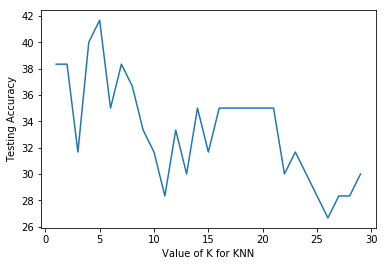

In [30]:
#training with the preprocessed validation set
accuracy_list = []
for k in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    neigh.fit(X, y) 
    predicted = neigh.predict(X_val)
    score = metrics.accuracy_score(y_val, predicted)
    accuracy_list.append(score*100)
        
#print(accuracy_list)



#following lines plots the graph of accuracies per number of neighbours 
plt.plot(range(1,30), accuracy_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

print("Highest accuracy with the validation set=",max(accuracy_list),"% and uses k=", np.argmax(accuracy_list)+1)



## This is with the test set

Highest accuracy with the test set= 61.111111111111114 % and uses k= 16


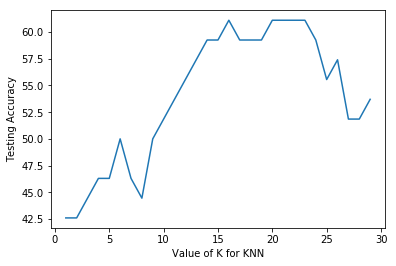

In [31]:
# Training with the test set

accuracy_list2 = []
for k in range(1,30):
    neigh2 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    neigh2.fit(X, y) 
    predicted2 = neigh2.predict(X_testing)
    score2 = metrics.accuracy_score(y_testing, predicted2)
    accuracy_list2.append(score2*100)
        
#print(accuracy_list2)

#following lines plots the graph of accuracies per number of neighbours 
plt.plot(range(1,30), accuracy_list2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


print("Highest accuracy with the test set=",max(accuracy_list2),"% and uses k=", np.argmax(accuracy_list2)+1)


## This is with the online test set

Highest accuracy with the online test set= 51.28205128205128 % and uses k= 14 .


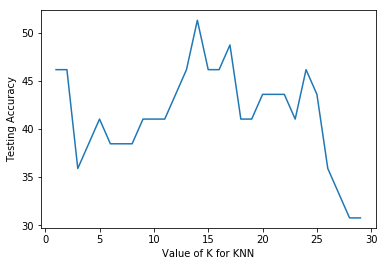

In [32]:
accuracy_list1 = []
for k in range(1,30):
    neigh1 = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    neigh1.fit(X, y) 
    predicted1 = neigh1.predict(X_test)
    score1 = metrics.accuracy_score(y_test, predicted1)
    accuracy_list1.append(score1*100)
        
#print(accuracy_list1)


#following lines plots the graph of accuracies per number of neighbours
plt.plot(range(1,30), accuracy_list1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


print("Highest accuracy with the online test set=",max(accuracy_list1),"% and uses k=", np.argmax(accuracy_list1)+1,".")


## These are the accuracies with all sets and averages

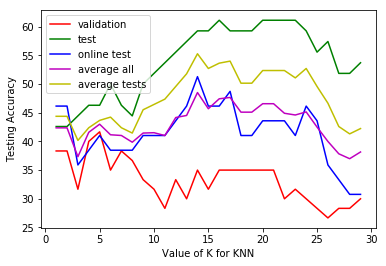

In [33]:
average_total = np.average(np.array([accuracy_list, accuracy_list2, accuracy_list1]), axis=0)
average_tests = np.average(np.array([accuracy_list2, accuracy_list1]), axis=0)

x = range(1,30)
y = [accuracy_list, accuracy_list2, accuracy_list1, average_total, average_tests]
labels=['validation', 'test', 'online test', 'average all', 'average tests']
colors=['r','g','b', 'm', 'y']

# loop over data, labels and colors
for i in range(len(y)):
    plt.plot(x,y[i],color=colors[i],label=labels[i])

    
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()


In [34]:
accuracy_list1

[46.15384615384615,
 46.15384615384615,
 35.8974358974359,
 38.46153846153847,
 41.02564102564102,
 38.46153846153847,
 38.46153846153847,
 38.46153846153847,
 41.02564102564102,
 41.02564102564102,
 41.02564102564102,
 43.58974358974359,
 46.15384615384615,
 51.28205128205128,
 46.15384615384615,
 46.15384615384615,
 48.717948717948715,
 41.02564102564102,
 41.02564102564102,
 43.58974358974359,
 43.58974358974359,
 43.58974358974359,
 41.02564102564102,
 46.15384615384615,
 43.58974358974359,
 35.8974358974359,
 33.33333333333333,
 30.76923076923077,
 30.76923076923077]

In [35]:
accuracy_list2[13]

59.25925925925925

In [36]:
a = np.array([accuracy_list, accuracy_list2, accuracy_list1]).T
np.savetxt("foo.csv", a, delimiter=",")